In [ ]:
if (!require("BiocManager", quietly = TRUE))
  install.packages("BiocManager")
BiocManager::install

In [24]:
library(BiocManager)
BiocManager::install('heatmaps')

Bioconductor version '3.14' is out-of-date; the current release version '3.19'
  is available with R version '4.4'; see https://bioconductor.org/install

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.14 (BiocManager 1.30.23), R 4.1.3 (2022-03-10)

Installing package(s) 'heatmaps'

also installing the dependencies 'abind', 'tiff', 'jpeg', 'fftwtools', 'plotrix', 'EBImage'





  There are binary versions available but the source versions are later:
        binary source needs_compilation
tiff    0.1-11 0.1-12              TRUE
plotrix  3.8-2  3.8-4             FALSE

  Binaries will be installed
package 'abind' successfully unpacked and MD5 sums checked
package 'tiff' successfully unpacked and MD5 sums checked
package 'jpeg' successfully unpacked and MD5 sums checked
package 'fftwtools' successfully unpacked and MD5 sums checked
package 'EBImage' successfully unpacked and MD5 sums checked
package 'heatmaps' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\3060\AppData\Local\Temp\RtmpOa6ywk\downloaded_packages


installing the source package 'plotrix'


Old packages: 'boot', 'broom', 'bslib', 'callr', 'codetools', 'crul', 'curl',
  'data.table', 'DBI', 'dbplyr', 'evaluate', 'fontawesome', 'future',
  'future.apply', 'gargle', 'ggplot2', 'glmnet', 'globals', 'googledrive',
  'googlesheets4', 'gtable', 'hardhat', 'highr', 'htmlwidgets', 'httr',
  'knitr', 'labeling', 'lava', 'lifecycle', 'listenv', 'locfit', 'matrixStats',
  'munsell', 'openssl', 'prettyunits', 'progress', 'progressr', 'quantmod',
  'RcppArmadillo', 'RCurl', 'recipes', 'rematch', 'repr', 'reprex',
  'rmarkdown', 'RSQLite', 'rstudioapi', 'rvest', 'scales', 'shape', 'shiny',
  'stringr', 'tidyselect', 'tidyverse', 'tiff', 'timeDate', 'tinytex',
  'viridisLite', 'withr', 'XML', 'xml2'



In [2]:
# load libraries
library(DESeq2)
library(tidyverse)
library(airway)
library(ggplot2)
library(pheatmap)
library(dplyr)
library(EnhancedVolcano)



Attaching package: 'dplyr'


The following object is masked from 'package:Biobase':

    combine


The following object is masked from 'package:matrixStats':

    count


The following objects are masked from 'package:GenomicRanges':

    intersect, setdiff, union


The following object is masked from 'package:GenomeInfoDb':

    intersect


The following objects are masked from 'package:IRanges':

    collapse, desc, intersect, setdiff, slice, union


The following objects are masked from 'package:S4Vectors':

    first, intersect, rename, setdiff, setequal, union


The following objects are masked from 'package:BiocGenerics':

    combine, intersect, setdiff, union


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: ggrepel

Registered S3 methods overwritten by 'ggalt':
  method                  from   
  grid.draw.absoluteGrob  ggplot2
 

In [3]:
# load counts table from GEO
urld <- "https://www.ncbi.nlm.nih.gov/geo/download/?format=file&type=rnaseq_counts"
path <- paste(urld, "acc=GSE115081", "file=GSE115081_raw_counts_GRCh38.p13_NCBI.tsv.gz", sep="&");
tbl <- as.matrix(data.table::fread(path, header=T, colClasses="integer"), rownames=1)

In [4]:
tbl

,GSM3164863,GSM3164864,GSM3164865,GSM3164866,GSM3164867,GSM3164868,GSM3164869,GSM3164870,GSM3164871,GSM3164872,GSM3164873,GSM3164874
100287102,1,1,2,1,2,3,9,4,9,24,17,7
653635,520,619,600,424,605,626,468,386,298,1016,649,522
102466751,13,13,16,10,19,24,9,3,2,10,8,1
107985730,0,0,0,0,0,0,1,1,0,1,0,0
100302278,0,0,0,0,0,0,0,0,0,1,0,0
645520,0,0,1,0,3,2,1,1,1,0,0,1
79501,0,0,0,0,0,0,0,0,0,0,1,0
100996442,13,22,13,17,20,19,29,20,10,20,20,9
729737,32,35,48,32,28,42,31,25,21,53,38,30
102725121,0,2,1,4,3,10,25,11,25,69,46,15


In [5]:
# Eliminar las columnas deseadas
tbl <- tbl[, !colnames(tbl) %in% c("GSM3164869", "GSM3164870", "GSM3164871", "GSM3164872", "GSM3164873", "GSM3164874")]

# Crear un vector con los nuevos nombres de columna
new_colnames <- c("Caco-2 cells of no treatment group-1",
                  "Caco-2 cells of no treatment group-2", 
                  "Caco-2 cells of no treatment group-3",
                  "Caco-2 cells of B. subtilis CW14 treatment group-1",
                  "Caco-2 cells of B. subtilis CW14 treatment group-2",
                  "Caco-2 cells of B. subtilis CW14 treatment group-3")

# Cambiar los nombres de columna de la tabla
colnames(tbl) <- new_colnames
tbl
# Guardar la tabla modificada en un archivo CSV
write.csv(tbl, file = "counts_data.csv", row.names = TRUE)

,Caco-2 cells of no treatment group-1,Caco-2 cells of no treatment group-2,Caco-2 cells of no treatment group-3,Caco-2 cells of B. subtilis CW14 treatment group-1,Caco-2 cells of B. subtilis CW14 treatment group-2,Caco-2 cells of B. subtilis CW14 treatment group-3
100287102,1,1,2,1,2,3
653635,520,619,600,424,605,626
102466751,13,13,16,10,19,24
107985730,0,0,0,0,0,0
100302278,0,0,0,0,0,0
645520,0,0,1,0,3,2
79501,0,0,0,0,0,0
100996442,13,22,13,17,20,19
729737,32,35,48,32,28,42
102725121,0,2,1,4,3,10


In [6]:
# Step 1: preparing count data ----------------

# read in counts data
#counts_data <- read.csv('counts_data.csv')
counts_data <- tbl
head(counts_data)


# read in sample info
# Cargar el archivo "sample_info.csv"
colData <- read.csv("sample_info.csv")
colData

,Caco-2 cells of no treatment group-1,Caco-2 cells of no treatment group-2,Caco-2 cells of no treatment group-3,Caco-2 cells of B. subtilis CW14 treatment group-1,Caco-2 cells of B. subtilis CW14 treatment group-2,Caco-2 cells of B. subtilis CW14 treatment group-3
100287102,1,1,2,1,2,3
653635,520,619,600,424,605,626
102466751,13,13,16,10,19,24
107985730,0,0,0,0,0,0
100302278,0,0,0,0,0,0
645520,0,0,1,0,3,2


sample,condition
<chr>,<chr>
Caco-2 cells of no treatment group-1,control
Caco-2 cells of no treatment group-2,control
Caco-2 cells of no treatment group-3,control
Caco-2 cells of B. subtilis CW14 treatment group-1,treatment
Caco-2 cells of B. subtilis CW14 treatment group-2,treatment
Caco-2 cells of B. subtilis CW14 treatment group-3,treatment


In [7]:
# Step 2: construct a DESeqDataSet object ----------

dds <- DESeqDataSetFromMatrix(countData = counts_data,
                       colData = colData,
                       design = ~ condition)

dds

Warning message in DESeqDataSet(se, design = design, ignoreRank):
"some variables in design formula are characters, converting to factors"


class: DESeqDataSet 
dim: 39376 6 
metadata(1): version
assays(1): counts
rownames(39376): 100287102 653635 ... 4576 4571
rowData names(0):
colnames(6): Caco-2 cells of no treatment group-1 Caco-2 cells of no
  treatment group-2 ... Caco-2 cells of B. subtilis CW14 treatment
  group-2 Caco-2 cells of B. subtilis CW14 treatment group-3
colData names(2): sample condition

In [8]:
# pre-filtering: removing rows with low gene counts
# keeping rows that have at least 10 reads total
keep <- rowSums(counts(dds)) >= 10
dds <- dds[keep,]

dds

class: DESeqDataSet 
dim: 23741 6 
metadata(1): version
assays(1): counts
rownames(23741): 100287102 653635 ... 4576 4571
rowData names(0):
colnames(6): Caco-2 cells of no treatment group-1 Caco-2 cells of no
  treatment group-2 ... Caco-2 cells of B. subtilis CW14 treatment
  group-2 Caco-2 cells of B. subtilis CW14 treatment group-3
colData names(2): sample condition

In [9]:
# set the factor level
dds$condition <- relevel(dds$condition, ref = "control")
dds$condition

[1] control   control   control   treatment treatment treatment
Levels: control treatment

In [10]:
# NOTE: collapse technical replicates

# Step 3: Run DESeq ----------------------
dds <- DESeq(dds)
res <- results(dds)

res

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



log2 fold change (MLE): condition treatment vs control 
Wald test p-value: condition treatment vs control 
DataFrame with 23741 rows and 6 columns
           baseMean log2FoldChange     lfcSE       stat      pvalue        padj
          <numeric>      <numeric> <numeric>  <numeric>   <numeric>   <numeric>
100287102   1.62507     0.64812939  1.521433  0.4259993    0.670108          NA
653635    561.49171    -0.00158134  0.148123 -0.0106759    0.991482    0.998981
102466751  15.58532     0.39590937  0.518099  0.7641577    0.444773    0.778697
100996442  17.42435     0.29255383  0.496273  0.5895016    0.555525    0.839103
729737     35.66816    -0.09457831  0.347035 -0.2725328    0.785212    0.937065
...             ...            ...       ...        ...         ...         ...
4541       28706.57      -0.904070  0.149109   -6.06316 1.33474e-09 3.46926e-07
4556        2440.39      -1.257502  0.170041   -7.39530 1.41086e-13 7.45253e-11
4519       71863.87      -0.544493  0.124782   -4.363

In [11]:
# Explore Results ----------------

summary(res)


out of 23741 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 653, 2.8%
LFC < 0 (down)     : 594, 2.5%
outliers [1]       : 1, 0.0042%
low counts [2]     : 7365, 31%
(mean count < 16)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [12]:
#export normalized read counts
normCounts <- counts(dds, normalized = T)
write.csv(normCounts, "normal_bacillus_subtilis_CW14.csv")


res <- results(dds, alpha = 0.05):

Ajuste de p-valores: En este caso, no se especifica un método de ajuste. Esto significa que el método por defecto de DESeq2 será utilizado, que es Benjamini-Hochberg (FDR). Este método es más adecuado cuando se está interesado en controlar el error tipo I en el contexto de múltiples pruebas.
Significancia: Los resultados se basan en los p-valores ajustados con el método por defecto (Benjamini-Hochberg).

In [12]:
res <- results(dds, alpha = 0.05)
summary(res)


out of 23741 with nonzero total read count
adjusted p-value < 0.05
LFC > 0 (up)       : 457, 1.9%
LFC < 0 (down)     : 384, 1.6%
outliers [1]       : 1, 0.0042%
low counts [2]     : 5984, 25%
(mean count < 9)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [17]:
res2 <- results(dds, pAdjustMethod = 'holm', alpha = 0.05)
summary(res2)


out of 23741 with nonzero total read count
adjusted p-value < 0.05
LFC > 0 (up)       : 87, 0.37%
LFC < 0 (down)     : 83, 0.35%
outliers [1]       : 1, 0.0042%
low counts [2]     : 6444, 27%
(mean count < 11)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [18]:
res3 <- results(dds, pAdjustMethod = 'BH', alpha = 0.05)
summary(res3)


out of 23741 with nonzero total read count
adjusted p-value < 0.05
LFC > 0 (up)       : 457, 1.9%
LFC < 0 (down)     : 384, 1.6%
outliers [1]       : 1, 0.0042%
low counts [2]     : 5984, 25%
(mean count < 9)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [13]:
# contrasts
resultsNames(dds)


[1] "Intercept"                      "condition_treatment_vs_control"

In [19]:
#output DESeq results
resOrdered <- res[order(res$padj),]
write.csv(resOrdered, "deseq_bacillus_subtilis_CW14.csv")



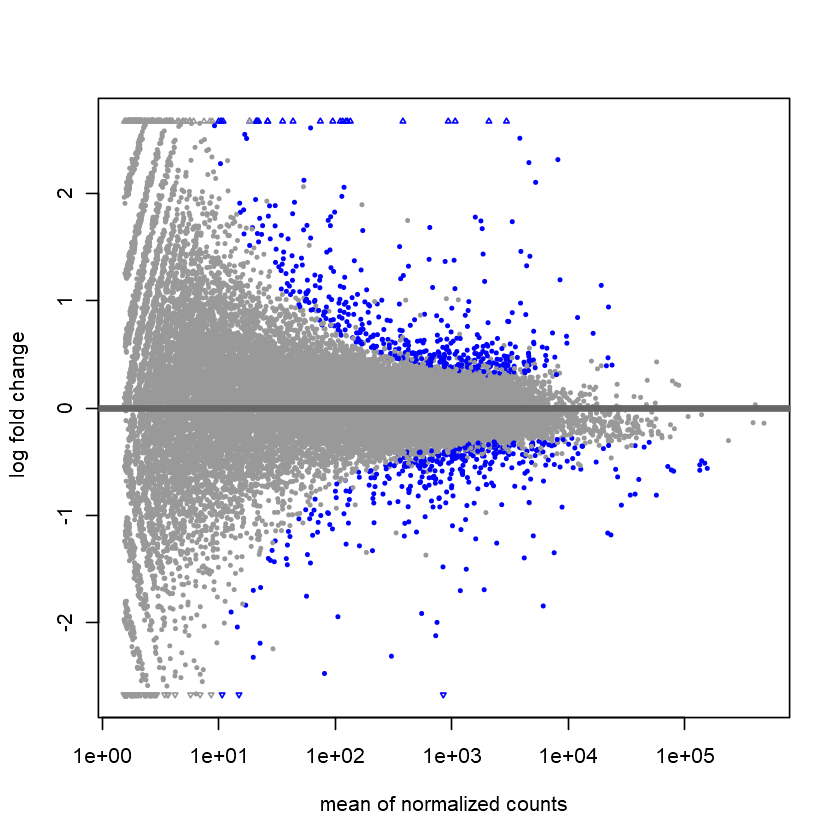

In [20]:
# MA plot
plotMA(res)

In [21]:
normCount <- read.csv("normal_bacillus_subtilis_CW14.csv", row.names = 1)
deSeqRes <- read.csv("deseq_bacillus_subtilis_CW14.csv", row.names = 1)
deSeqRes$sig <- ifelse(deSeqRes$padj <= 0.05, "yes", "no")
deSeqRes <- na.omit(deSeqRes)
deSeqRes

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,sig
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
5997,730.26415,-2.1194426,0.1601114,-13.237304,5.343253e-40,9.487481e-36,yes
133,1336.23755,-1.5004303,0.1223231,-12.266121,1.376936e-34,1.222444e-30,yes
7124,116.05281,3.8846505,0.3294985,11.789583,4.417219e-32,2.614405e-28,yes
2353,6121.51668,-1.8427277,0.1651817,-11.155762,6.711557e-29,2.979260e-25,yes
4576,1188.35946,-1.7000514,0.1581400,-10.750292,5.907463e-27,2.097858e-23,yes
4572,304.32987,-2.3099175,0.2220538,-10.402511,2.414836e-25,7.146303e-22,yes
10769,1611.25040,-1.2177908,0.1235712,-9.854975,6.523315e-23,1.654685e-19,yes
414236,95.35817,3.6066666,0.3759671,9.593039,8.552804e-22,1.898295e-18,yes
3659,1786.58188,1.7410916,0.1831289,9.507467,1.953615e-21,3.854266e-18,yes


Gráfico de dispersión de log2FoldChange vs. log1O(baseMean):

Este gráfico te permite visualizar la relación entre la expresión media de los genes (log1O(baseMean)) y la diferencia de expresión entre condiciones (log2FoldChange). Los genes con una mayor diferencia de expresión y una mayor expresión media son más probables de ser importantes.

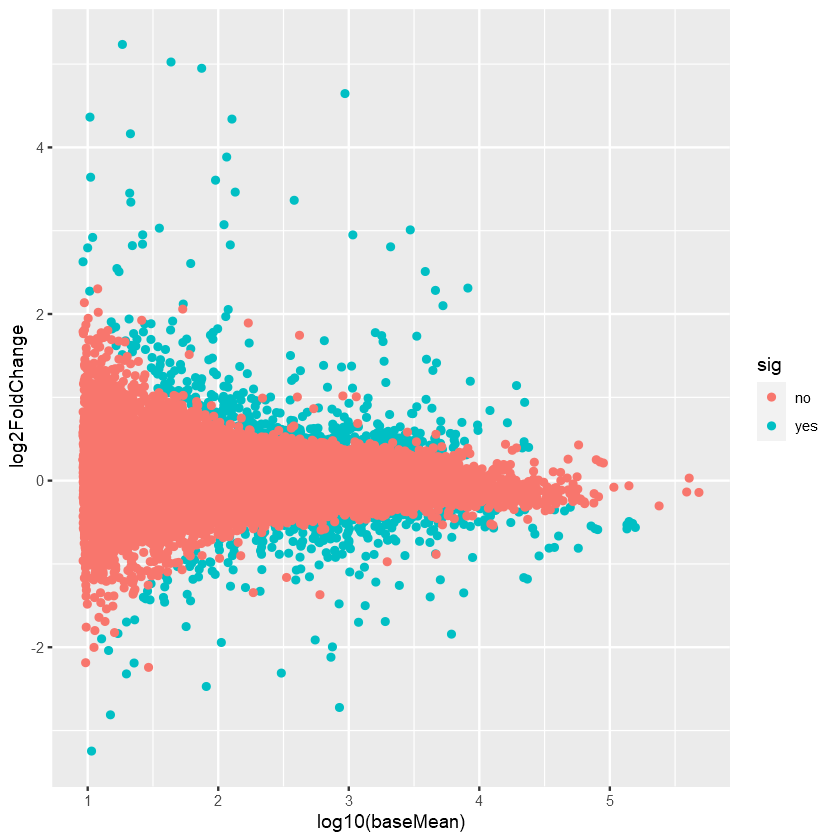

In [22]:
#Gráfico PlotMa
ggplot(deSeqRes, aes(x = log10(baseMean), y = log2FoldChange, color = sig)) + geom_point()

Gráfico de dispersión de log2FoldChange vs. p-value:

Este gráfico te permite visualizar la relación entre la diferencia de expresión y el nivel de significación (p-value). Los genes con una mayor diferencia de expresión y un p-value más bajo son más probables de ser importantes.

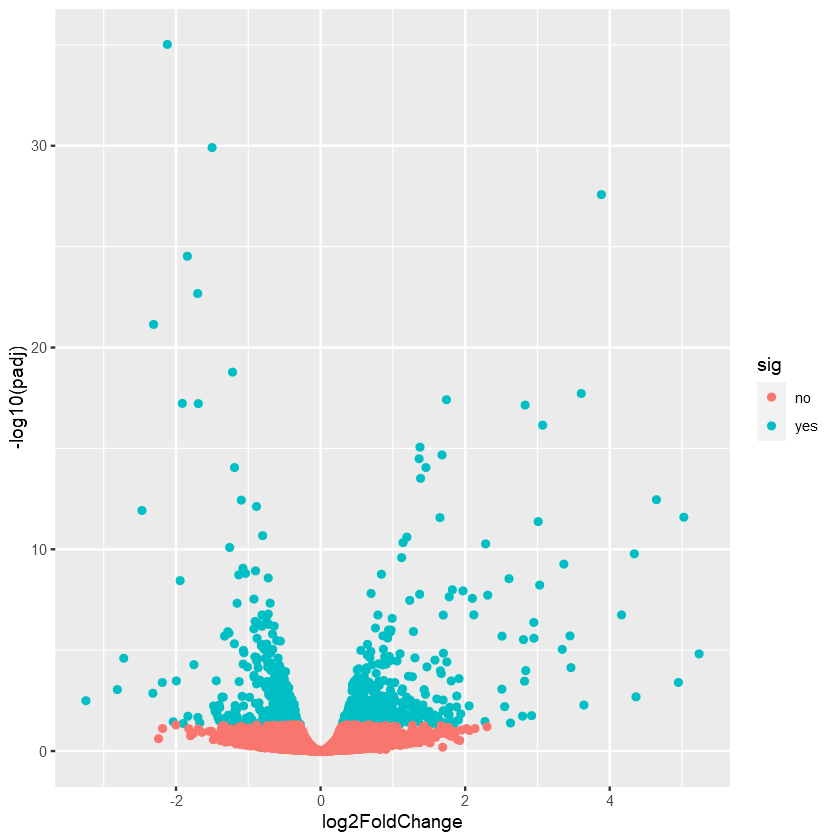

In [23]:
#volcano plot
ggplot(deSeqRes, aes(x = log2FoldChange, y = -log10(padj), color = sig)) + geom_point()

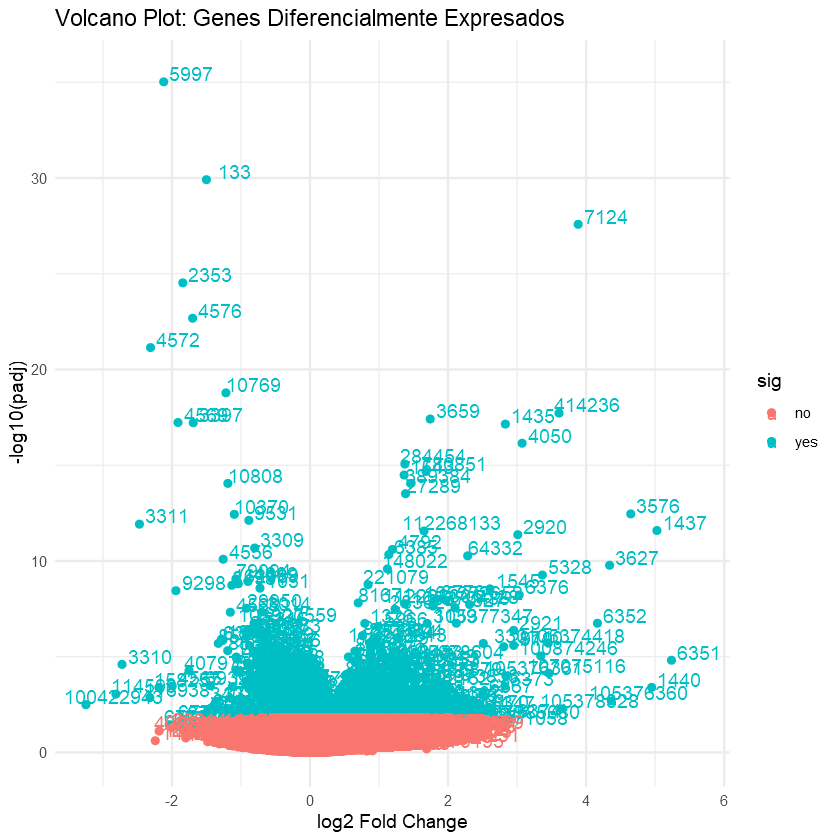

In [24]:
# Crea el gráfico de volcán con etiquetas de genes

ggplot(deSeqRes, aes(x = log2FoldChange, y = -log10(padj), color = sig)) +
  geom_point() +
  geom_text(aes(label = rownames(deSeqRes)), nudge_x = 0.4, nudge_y = 0.4) +  # Agrega las etiquetas
  labs(x = "log2 Fold Change", y = "-log10(padj)", title = "Volcano Plot: Genes Diferencialmente Expresados") +
  theme_minimal()

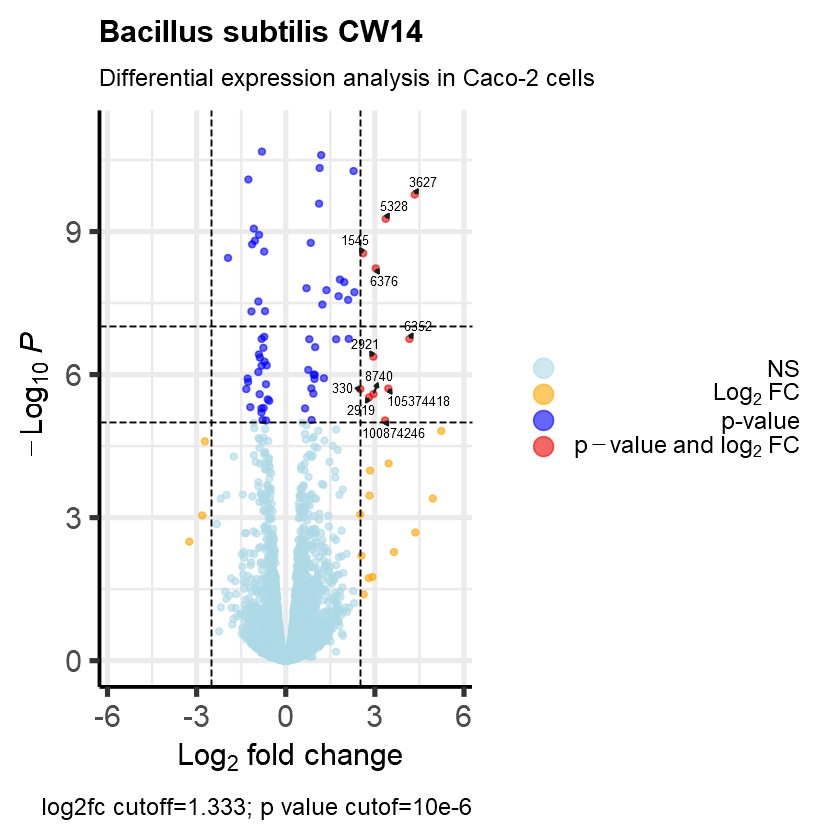

In [19]:
# Crear volcanoplot de grado de publicación con genes de interés marcados
EnhancedVolcano(res,
                lab = rownames(res),
                x = 'log2FoldChange',
                y = 'padj',
                pCutoff = 10e-6,
                FCcutoff = 2.5,
                xlim = c(-5.7, 5.7),
                ylim = c(0, -log10(10.2e-12)),
                pointSize = 1.3,
                labSize = 2.6,
                title = 'Bacillus subtilis CW14',
                subtitle = 'Differential expression analysis in Caco-2 cells',
                caption = 'log2fc cutoff=1.333; p value cutof=10e-6',
                legendPosition = "right",
                legendLabSize = 14,
                col = c('lightblue', 'orange', 'blue', 'red2'),
                colAlpha = 0.6,
                drawConnectors = TRUE,
                hline = c(10e-8),
                widthConnectors = 0.5)

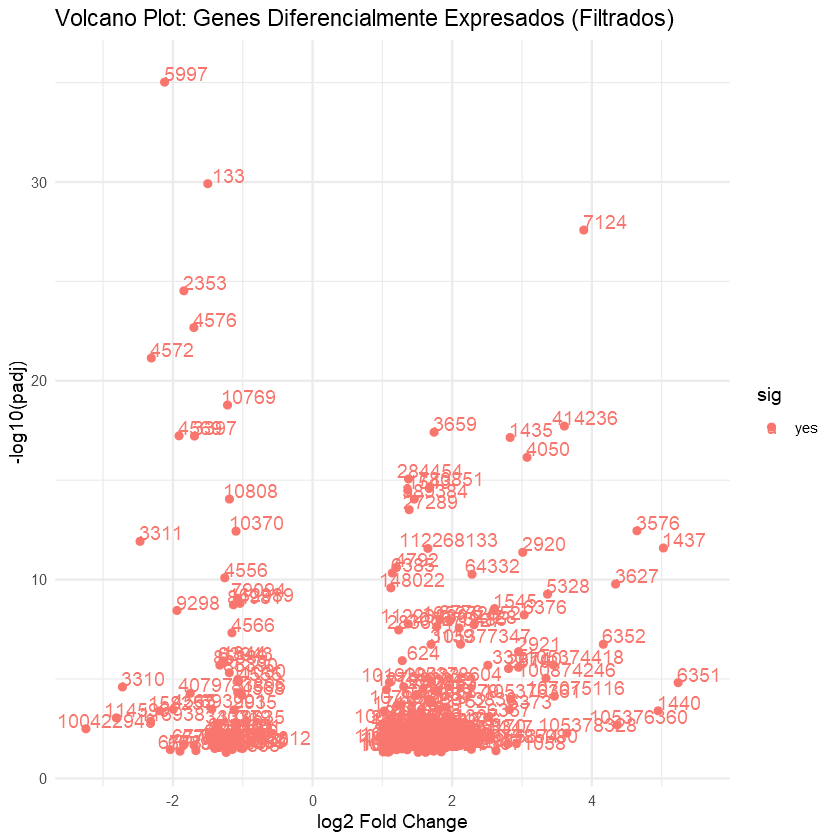

In [28]:
# Filtra los datos para incluir solo los genes significativos
umbral_pvalor <- 0.05
umbral_foldchange <- 2  # Por ejemplo, considera genes con un cambio de plegamiento mayor a 2

# Agrega una columna con los nombres de los genes
deSeqRes$gene_name <- row.names(deSeqRes)
deSeqRes_filtrado <- deSeqRes %>%
  filter(padj <= umbral_pvalor, abs(log2FoldChange) >= log2(umbral_foldchange))

# Crea el gráfico de volcán con los datos filtrados
library(ggplot2)
ggplot(deSeqRes_filtrado, aes(x = log2FoldChange, y = -log10(padj), color = sig)) +
  geom_point() +
  geom_text(aes(label = gene_name), nudge_x = 0.3, nudge_y = 0.4) +
  labs(x = "log2 Fold Change", y = "-log10(padj)", title = "Volcano Plot: Genes Diferencialmente Expresados (Filtrados)") +
  theme_minimal()
write.csv(deSeqRes_filtrado, "deSeqRes_filtrado_bacillus_subtilis_CW14.csv")

El gráfico de PCA permite visualizar la estructura de los datos y observar cómo se agrupan las muestras en función de su expresión génica. Las muestras con perfiles de expresión similares se agruparán cerca unas de otras en el gráfico. Esto es útil para:

Identificar patrones de agrupamiento: Ver si las muestras se agrupan de acuerdo con las condiciones experimentales, lo cual puede sugerir diferencias biológicas entre grupos.
Detectar muestras atípicas: Identificar muestras que no se agrupan con otras de su condición, lo cual podría indicar problemas técnicos o biológicos.
Explorar la variabilidad en los datos: Entender qué proporción de la variación total es explicada por los primeros componentes principales.

,Caco-2 cells of no treatment group-1,Caco-2 cells of no treatment group-2,Caco-2 cells of no treatment group-3,Caco-2 cells of B. subtilis CW14 treatment group-1,Caco-2 cells of B. subtilis CW14 treatment group-2,Caco-2 cells of B. subtilis CW14 treatment group-3
100287102,0.6998545,0.700350,0.7074343,0.7013742,0.7104171,0.7159656
653635,9.0511920,9.239859,9.0930900,8.9948718,9.2494596,9.1304477
102466751,3.9363539,3.941523,3.9491380,3.9246671,3.9967142,4.0088279
100996442,4.0751895,4.155126,4.0643363,4.1272862,4.1443443,4.1106458
729737,5.1256752,5.158366,5.2079200,5.1584879,5.1141051,5.1704124
102725121,1.6649719,1.684401,1.6728435,1.7062896,1.6947646,1.7477162


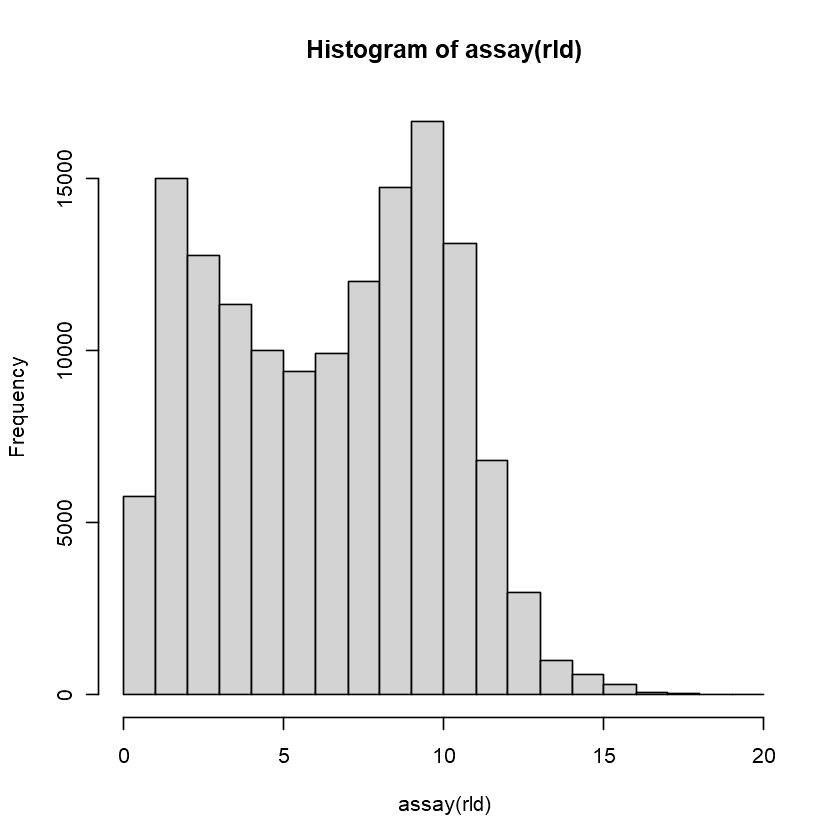

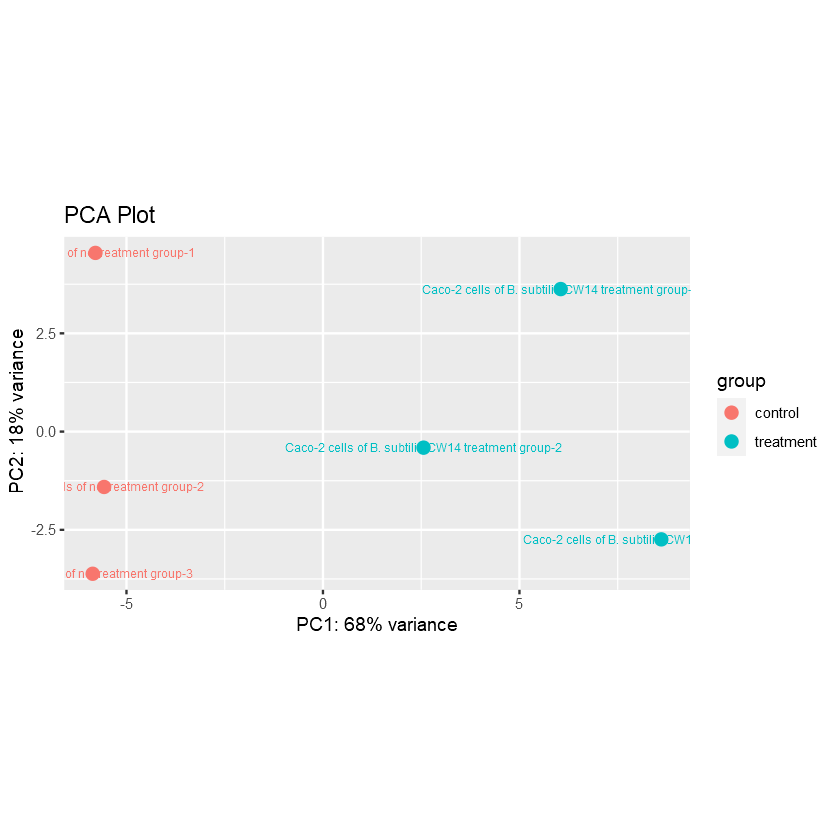

In [29]:
rld <- rlogTransformation(dds, blind = FALSE)
head(assay(rld))
hist(assay(rld))
PCAA <- plotPCA(rld, intgroup='condition')
PCAA + geom_text(aes(label = name),size = 2.5)+ggtitle('PCA Plot')

Este heatmap ayuda a visualizar y explorar los patrones de expresión de los genes significativamente diferenciados, permitiendo identificar grupos de genes que pueden estar coexpresados o que presentan patrones de expresión similares bajo diferentes condiciones experimentales. Es una herramienta útil para detectar patrones globales y potencialmente identificar genes o conjuntos de genes que podrían estar relacionados funcionalmente.

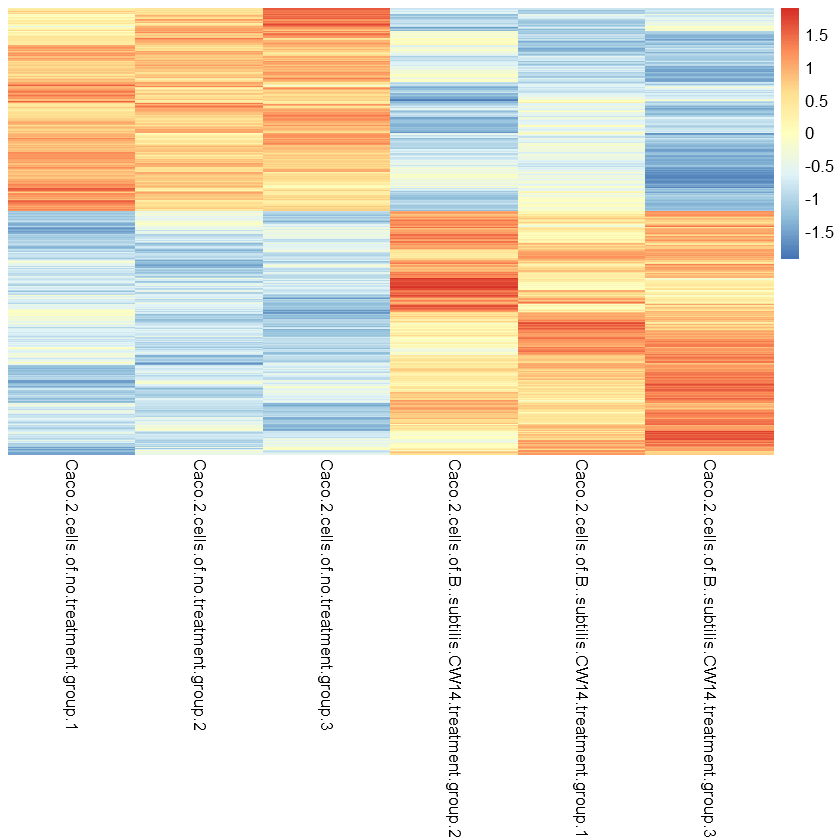

In [30]:
#pheatmap
signi <- subset(deSeqRes, padj <= 0.05)
allSig <- merge(normCount, signi, by = 0)
sigCounts <- allSig[,2:7]
row.names(sigCounts) <- allSig$Row.names
pheatmap(log2(sigCounts + 1), scale = 'row', show_rownames = F, treeheight_row = 0, treeheight_col = 0)



In [14]:
######################################################################################################################################

# Crear el marco de datos final que consiste en resultados deseq ordenados basados en log2fc

# Create the final dataframe consisting of ordered DESeq results based on log2FoldChange
resord = as.data.frame(res)
finaltable = cbind(rownames(res), resord)
finaltable = finaltable[order(finaltable$log2FoldChange), ]
write.table(finaltable, file = 'finaltable_ori.csv', sep = ',', col.names = NA)

# Filtrar genes con cambios de expresión significativos (positivos o negativos)
# Usamos el criterio p-value ajustado < 10e-7 y log2FoldChange ≥ 2.5 o ≤ -2.5
significativos <- resord[which(resord$padj < 0.05 & (resord$log2FoldChange >= 2 | resord$log2FoldChange <= -2)), ]

# Asegurarse de que los nombres de los genes estén alineados con las filas de resultados significativos
# Filtramos solo aquellos genes que están en `significativos`
significativos_table <- significativos
significativos_table$Gene.Name <- rownames(significativos)

# Renombrar la columna de los nombres de los genes para mayor claridad
colnames(significativos_table)[ncol(significativos_table)] <- "Gene.Name"

# Guardar el archivo CSV con los genes significativos
write.table(significativos_table, file = 'significativo.csv', sep = ',', row.names = FALSE, col.names = TRUE)

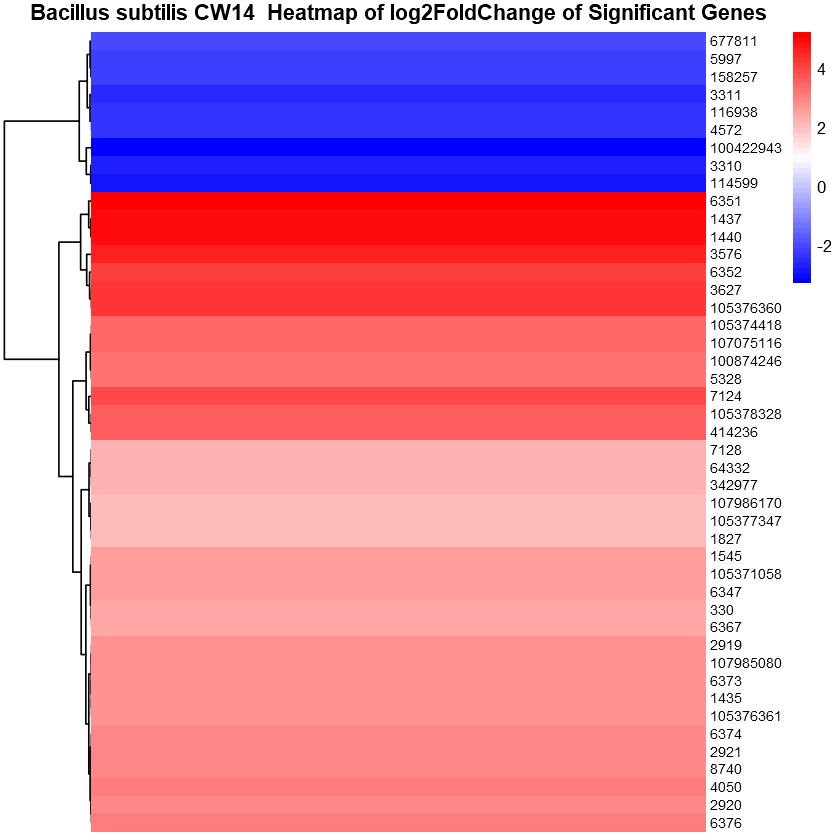

In [18]:
# heatmap
# Cargar la tabla de genes significativos (assume that this is the filtered data)
significativos_table <- read.csv('significativo.csv')

# Seleccionar las columnas que nos interesan (Gene.Name, log2FoldChange)
# Asumiendo que log2FoldChange está en la columna log2FoldChange
gene_log2FC <- data.frame(Gene.Name = significativos_table$Gene.Name, log2FoldChange = significativos_table$log2FoldChange)

# Usamos los valores de log2FoldChange como una matriz para el heatmap
# Como no tenemos múltiples muestras, el heatmap será unidimensional basado en los valores de log2FoldChange

# Crear una matriz con Gene.Name como filas y log2FoldChange como valores
matriz_log2FC <- as.matrix(gene_log2FC$log2FoldChange)
rownames(matriz_log2FC) <- gene_log2FC$Gene.Name

# Crear el heatmap usando pheatmap
pheatmap(matriz_log2FC,
         color = colorRampPalette(c("blue", "white", "red"))(50),  # Colores desde azul (bajo) a rojo (alto)
         border_color = NA,  # Sin bordes entre celdas
         cluster_cols = FALSE,  # No agrupar columnas, ya que solo hay una
         cluster_rows = TRUE,  # Agrupar filas (genes)
         main = "Bacillus subtilis CW14  Heatmap of log2FoldChange of Significant Genes",
         fontsize_row = 8,  # Tamaño de la fuente para los nombres de los genes
         show_colnames = FALSE  # Ocultar los nombres de columnas
)